In [81]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def histeq(image):
    hist=np.array(image.histogram(),dtype='float32')
    x,y=image.size
    summ=0
    for i in range(256):
        summ+=hist[i]
        hist[i]=summ*255/(x*y)
    return np.uint8(np.rint(hist))

In [83]:
def apply_eq(image,hist):
    x,y=image.size
    arr_img=np.array(image).reshape(x*y)
    for i in range(len(arr_img)):
        arr_img[i]=hist[arr_img[i]]
    return Image.fromarray(arr_img.reshape((y,x)))

array([[108, 110, 110, ...,  85,  85,  84],
       [107, 109, 110, ...,  85,  85,  84],
       [105, 108, 109, ...,  85,  84,  84],
       ...,
       [ 99,  97,  97, ...,  81,  82,  83],
       [100,  97,  97, ...,  86,  87,  89],
       [100,  97,  97, ...,  93,  94,  95]], dtype=uint8)

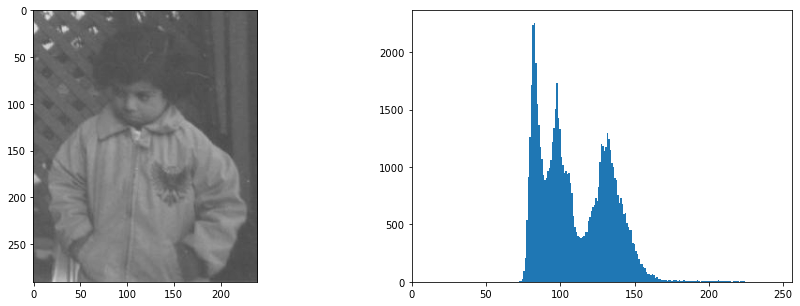

In [84]:
img=Image.open('pout.jpg').convert('L')
arr=np.array(img)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[1].hist(arr.reshape(arr.size),bins=len([i for i in img.histogram() if i]))
axes[1].set(xlim=(0,256))
arr

In [85]:
equal_grey_levels=histeq(img)
equal_grey_levels       # indices are old grey levels

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         3,   6,  11,  17,  26,  34,  41,  46,  51,  56,  60,  63,  66,
        69,  73,  77,  81,  85,  90,  95, 102, 107, 112, 116, 119, 123,
       126, 130, 133, 136, 139, 141, 143, 145, 146, 148, 149, 150, 152,
       153, 155, 157, 159, 161, 164, 166, 169, 171, 174, 178, 183, 187,
       191, 195, 200, 205, 209, 213, 216, 220, 223, 226, 228, 231, 233,
       235, 237, 239, 241, 243, 244, 246, 247, 248, 249, 249, 250, 251,
       251, 251, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253,
       253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

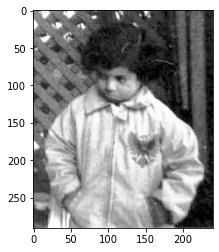

In [86]:
equal_img=apply_eq(img,equal_grey_levels)
plt.imshow(equal_img,cmap='gray',vmin=0,vmax=255)

array([[139, 143, 143, ...,  46,  46,  41],
       [136, 141, 143, ...,  46,  46,  41],
       [130, 139, 141, ...,  46,  41,  41],
       ...,
       [107,  95,  95, ...,  17,  26,  34],
       [112,  95,  95, ...,  51,  56,  63],
       [112,  95,  95, ...,  77,  81,  85]], dtype=uint8)

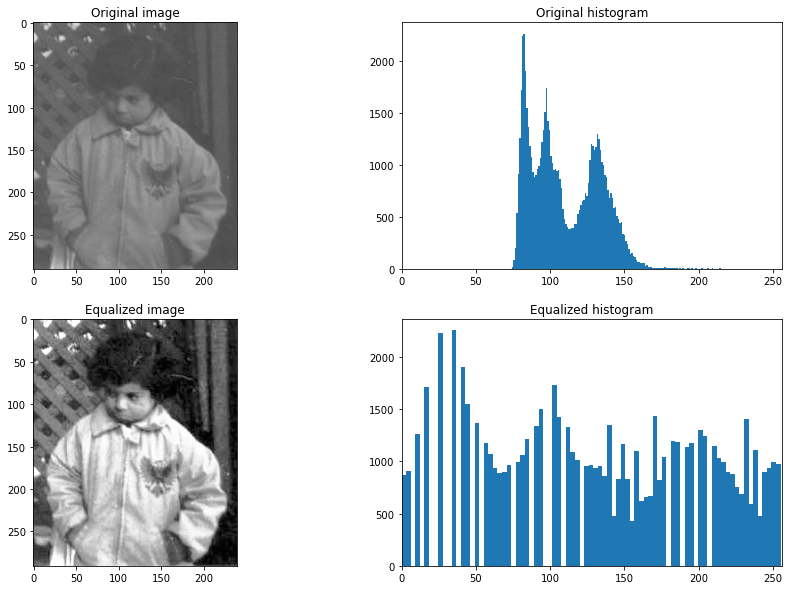

In [87]:
equal_arr=np.array(equal_img)

fig,axes=plt.subplots(2,2,figsize=(15,10))

axes[0,0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0,0].set(title='Original image')

axes[0,1].hist(arr.reshape(arr.size),bins=len([i for i in img.histogram() if i]))
axes[0,1].set(title='Original histogram',xlim=(0,256))

axes[1,0].imshow(equal_img,cmap='gray',vmin=0,vmax=255)
axes[1,0].set(title='Equalized image')

axes[1,1].hist(equal_arr.reshape(equal_arr.size),bins=len([i for i in equal_img.histogram() if i]))
axes[1,1].set(title='Equalized histogram',xlim=(0,256))

equal_arr